Author: Rizka Aulia Khair Mustarih

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt


# Load Dataset

In [29]:
df_dataset = pd.read_csv('loan_customer.csv')

In [30]:
df_dataset.head(10)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE
5,LP001011,1986-01-22,6.281103e+10,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267000,360,30,1.0,NaN,house,APPROVE
6,LP001013,1979-06-16,6.281118e+11,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95000,360,30,1.0,NaN,house,APPROVE
7,LP001014,1999-05-21,6.285676e+11,Male,Yes,3+,Graduate,No,3036.0,2504.0,158000,360,30,0.0,NaN,apartment,REJECT
8,LP001018,1987-08-25,6.285290e+11,Male,Yes,2,Graduate,No,4006.0,1526.0,168000,360,30,1.0,NaN,house,APPROVE
9,LP001020,1983-12-13,6.281187e+11,Male,Yes,1,Graduate,No,12841.0,10968.0,349000,360,30,1.0,NaN,apartment,REJECT


In [31]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

In [32]:
df_dataset['birth_date'] = pd.to_datetime(df_dataset['birth_date'])

In [33]:
df_dataset['phone_number'] = df_dataset['phone_number'].astype(str)

In [34]:
df_dataset.drop('has_credit_card', axis=1, inplace=True)  #jika ada MV banyak diSALAHSATU kolom, diapus

In [35]:
df_dataset.drop('birth_date', axis=1, inplace=True)  #jika ada MV banyak diSALAHSATU kolom, diapus

In [36]:
df_dataset.shape

(621, 15)

In [37]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   phone_number        621 non-null    object 
 2   gender              608 non-null    object 
 3   married             618 non-null    object 
 4   dependents          605 non-null    object 
 5   education           620 non-null    object 
 6   self_employed       588 non-null    object 
 7   applicant_income    612 non-null    float64
 8   coapplicant_income  621 non-null    float64
 9   loan_amount         621 non-null    int64  
 10  loan_term_month     621 non-null    int64  
 11  loan_term_year      621 non-null    int64  
 12  credit_history      570 non-null    float64
 13  property_type       620 non-null    object 
 14  loan_status         621 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 72.9+ KB

In [38]:
df_dataset.describe()  #statistika deskriptif (var nuumerik)

,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,612.000000,621.000000,621.000000,621.000000,621.000000,570.000000
mean,5681.549020,1616.874267,145133.655395,342.608696,28.550725,0.842105
std,9056.454103,2915.075138,84011.115879,64.090837,5.340903,0.364963
min,150.000000,0.000000,9000.000000,12.000000,1.000000,0.000000
25%,2874.500000,0.000000,100000.000000,360.000000,30.000000,1.000000
50%,3812.500000,1167.000000,125000.000000,360.000000,30.000000,1.000000
75%,5815.750000,2302.000000,165000.000000,360.000000,30.000000,1.000000
max,170578.000000,41667.000000,700000.000000,480.000000,40.000000,1.000000


# Data Cleansing

## Handling missing values

In [39]:
df_dataset.isnull().any()

loan_id               False
phone_number          False
gender                 True
married                True
dependents             True
education              True
self_employed          True
applicant_income       True
coapplicant_income    False
loan_amount           False
loan_term_month       False
loan_term_year        False
credit_history         True
property_type          True
loan_status           False
dtype: bool

In [41]:
(df_dataset.isnull().sum()/len(df_dataset)).to_frame('persentase missing')

,persentase missing
loan_id,0.000000
phone_number,0.000000
gender,0.020934
married,0.004831
dependents,0.025765
education,0.001610
self_employed,0.053140
applicant_income,0.014493
coapplicant_income,0.000000
loan_amount,0.000000


In [40]:
df=df_dataset.isnull().sum().sort_values(ascending= False)
df

credit_history        51
self_employed         33
dependents            16
gender                13
applicant_income       9
married                3
education              1
property_type          1
loan_id                0
phone_number           0
coapplicant_income     0
loan_amount            0
loan_term_month        0
loan_term_year         0
loan_status            0
dtype: int64

In [75]:
## Fill the null values of numerical datatype
df_dataset['credit_history'] = df_dataset['credit_history'].fillna(df_dataset['credit_history'].mean())
df_dataset['applicant_income'] = df_dataset['applicant_income'].fillna(df_dataset['applicant_income'].mean())

In [74]:
## Fill the null values of object datatype
df_dataset['self_employed'] = df_dataset['self_employed'].fillna(df_dataset['self_employed'].mode()[0])
df_dataset['dependents'] = df_dataset['dependents'].fillna(df_dataset['dependents'].mode()[0])
df_dataset['gender'] = df_dataset['gender'].fillna(df_dataset['gender'].mode()[0])
df_dataset['married'] = df_dataset['married'].fillna(df_dataset['married'].mode()[0])
df_dataset['education'] = df_dataset['education'].fillna(df_dataset['education'].mode()[0])
df_dataset['property_type'] = df_dataset['property_type'].fillna(df_dataset['property_type'].mode()[0])

In [76]:
df=df_dataset.isnull().sum()
df

loan_id               0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

In [78]:
df_dataset.shape

(616, 15)

## Handling duplicated data

In [42]:
df_dataset.duplicated().sum()

5

In [43]:
df_dataset.loc[df_dataset.duplicated()]

,loan_id,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
90,LP001310,628131021360.0,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,apartment,APPROVE
279,LP001904,62811520563.0,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE
308,LP001990,628527921833.0,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,house,REJECT
363,LP002160,628115255742.0,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,apartment,APPROVE
401,LP002277,628138392877.0,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,house,REJECT


In [44]:
#random sampel, bukti ada data dplikat
df_dataset.query('loan_id == "LP001904"')

,loan_id,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
278,LP001904,62811520563.0,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE
279,LP001904,62811520563.0,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE


In [45]:
df_dataset.drop_duplicates(inplace=True)

In [27]:
#apakah random sampel telah di drop atau masih ada
df_dataset.query('loan_id == "LP001904"')

,loan_id,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
278,LP001904,62811520563.0,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE


In [47]:
df_dataset.duplicated().sum() #re-cek secara keseluruhan data dplikat

0

In [48]:
df_dataset.shape

(616, 15)

In [49]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 620
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             616 non-null    object 
 1   phone_number        616 non-null    object 
 2   gender              603 non-null    object 
 3   married             613 non-null    object 
 4   dependents          600 non-null    object 
 5   education           615 non-null    object 
 6   self_employed       583 non-null    object 
 7   applicant_income    607 non-null    float64
 8   coapplicant_income  616 non-null    float64
 9   loan_amount         616 non-null    int64  
 10  loan_term_month     616 non-null    int64  
 11  loan_term_year      616 non-null    int64  
 12  credit_history      565 non-null    float64
 13  property_type       615 non-null    object 
 14  loan_status         616 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 77.0+ KB

## Handling Outlier

In [50]:
# Categorical and Numerical Columns
categorical_columns = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_type']
numerical_columns = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']

categorical_columns, numerical_columns

(['gender',
  'married',
  'dependents',
  'education',
  'self_employed',
  'property_type'],
 ['applicant_income',
  'coapplicant_income',
  'loan_amount',
  'loan_term_month',
  'loan_term_year',
  'credit_history'])

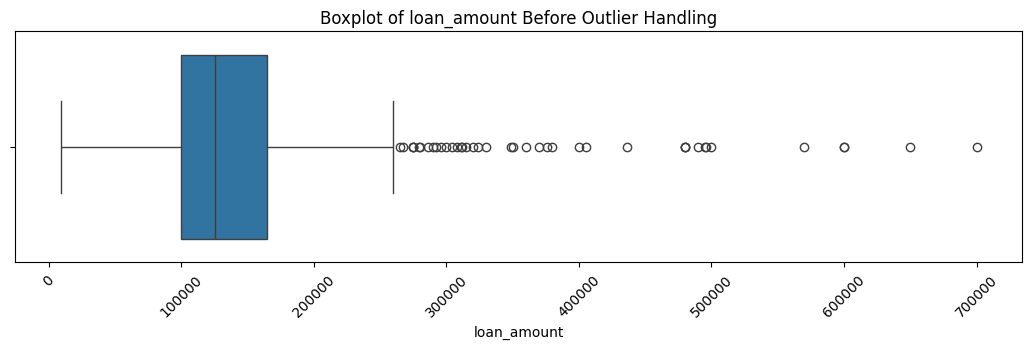

In [71]:
plt.figure(figsize=(13,3))

sns.boxplot(x='loan_amount', data=df2)
plt.title('Boxplot of loan_amount Before Outlier Handling')
plt.xticks(rotation=45)
plt.show()


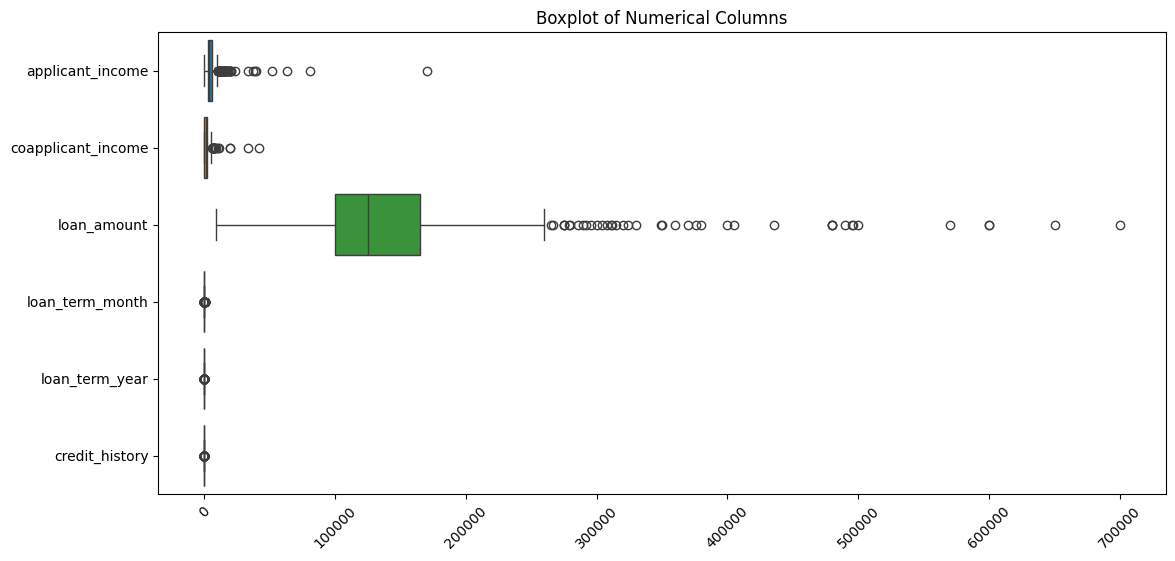

In [72]:
plt.figure(figsize=(13,6))
sns.boxplot(data=df2[numerical_columns], orient='h')
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [73]:
for col in numerical_columns:
  Q1 = df2[col].quantile(0.25)
  Q3 = df2[col].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - 1.5 * IQR
  high_limit = Q3 + 1.5 * IQR

  df2 = df2[(df2[col] >= low_limit) & (df2[col] <= high_limit)]


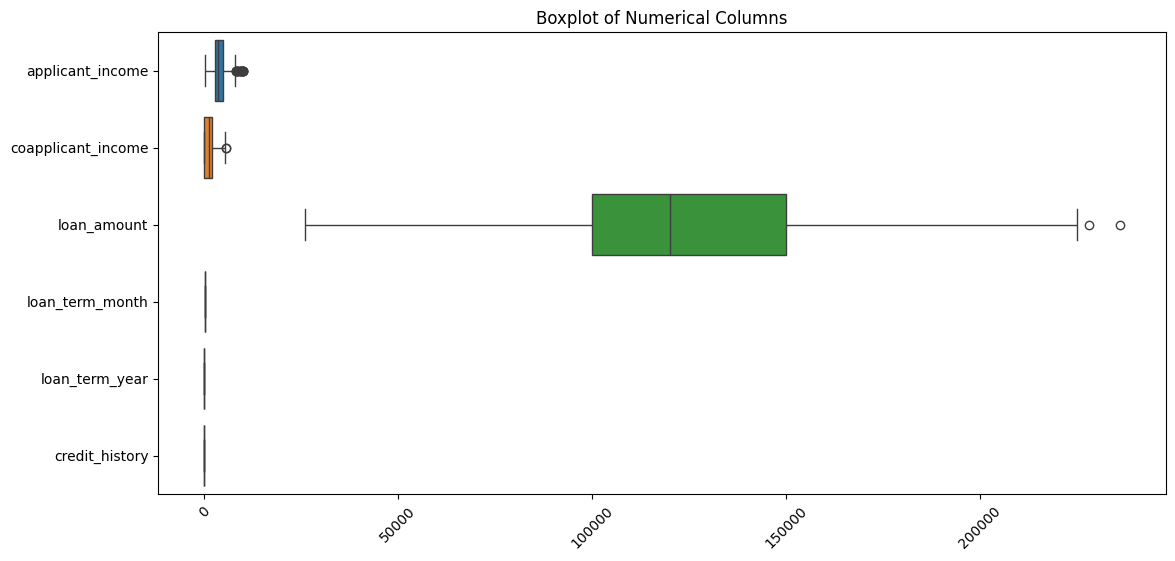

In [80]:
#cek after Handling Outlier

plt.figure(figsize=(13,6))
sns.boxplot(data=df2[numerical_columns], orient='h')
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

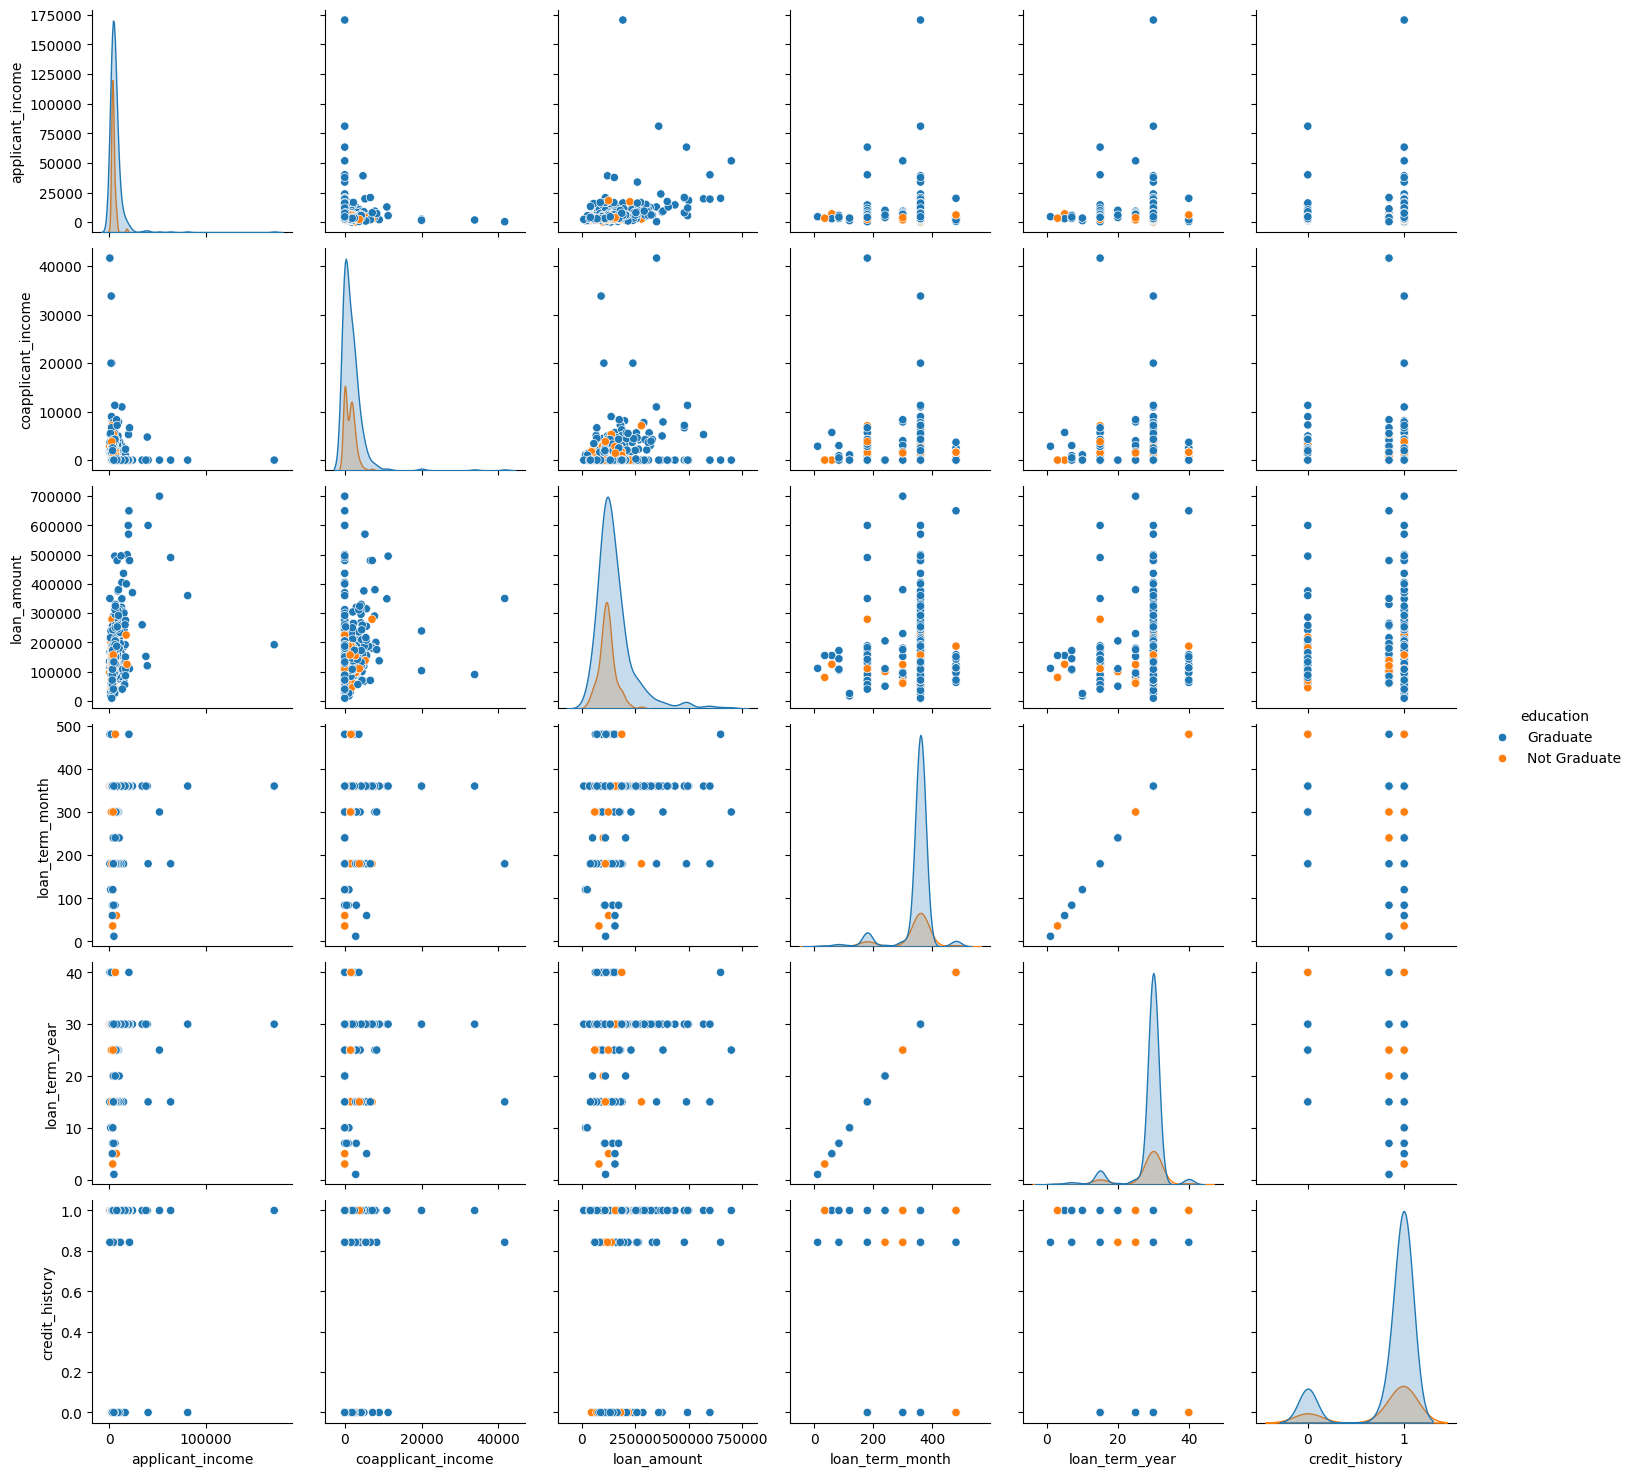

In [81]:
sns.pairplot(data=df_dataset,hue='education')
plt.show()

## Feature Encoding

In [51]:
####     CARA OrdinalEncoder

### df1 = df_dataset.copy()
### from sklearn.preprocessing import OrdinalEncoder
### ord_enc = OrdinalEncoder()
### columns_to_encode = ['gender', 'education', 'married','self_employed', 'property_type']
### df1[columns_to_encode] = ord_enc.fit_transform(df1[columns_to_encode])
### df1.head(20)

In [67]:
df2 = df_dataset.copy()

In [69]:
##### CARA2 LabelEncoder
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

cols = ['gender', 'education', 'married','self_employed', 'property_type']
for col in cols:
  df2[col] =  le.fit_transform(df2[col])
df2
## Encoding Technique : Label Encoding, One Hot Encoding

,loan_id,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,628114203187.0,1,0,0,0,0,5849.0,0.0,100000,360,30,1.0,1,APPROVE
1,LP001003,628776449212.0,1,1,1,0,0,4583.0,1508.0,128000,360,30,1.0,2,REJECT
2,LP001005,628119240537.0,1,1,0,0,1,3000.0,0.0,66000,360,30,1.0,1,APPROVE
3,LP001006,62856343702.0,1,1,0,1,0,2583.0,2358.0,120000,360,30,1.0,1,APPROVE
4,LP001008,628113008687.0,1,0,0,0,0,6000.0,0.0,141000,360,30,1.0,1,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,628564969545.0,0,0,0,0,0,2900.0,0.0,71000,360,30,1.0,2,APPROVE
617,LP002979,628116531578.0,1,1,3+,0,0,4106.0,0.0,40000,180,15,1.0,2,APPROVE
618,LP002983,628115828430.0,1,1,1,0,0,8072.0,240.0,253000,360,30,1.0,1,APPROVE
619,LP002984,628119590176.0,1,1,2,0,0,7583.0,0.0,187000,360,30,1.0,1,APPROVE


# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

In [54]:
df_dataset.shape

(616, 15)

In [55]:
CT = pd.crosstab(index=df_dataset['married'], columns=df_dataset['property_type'], margins=True)
CT

property_type,apartment,house,studio,All
married,,,,
No,80,70,63,213
Yes,151,132,116,399
All,231,202,179,612


In [96]:
df_gr2 = df_dataset.groupby(['married', 'property_type'])['loan_id'].count().reset_index()
df_gr2.columns = ['married', 'property_type', 'count'] #ganti nama "loan_id"
df_gr2

,married,property_type,count
0,No,apartment,80
1,No,house,70
2,No,studio,63
3,Yes,apartment,154
4,Yes,house,133
5,Yes,studio,116


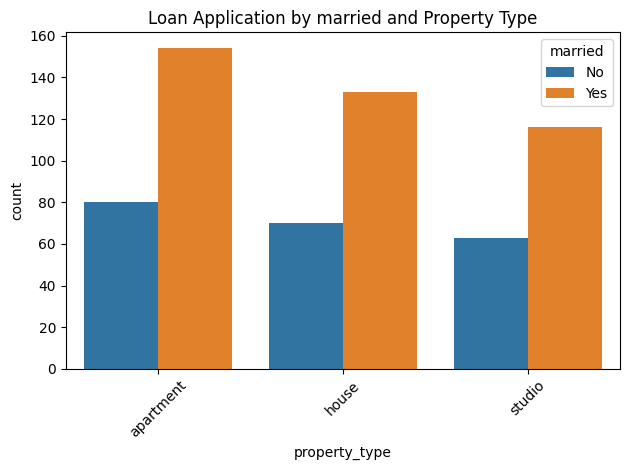

In [97]:
sns.barplot(x='property_type', y='count', hue='married', data=df_gr2)

plt.title('Loan Application by married and Property Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
CT = pd.crosstab(index=df_dataset['gender'], columns=df_dataset['property_type'], margins=True)
CT

property_type,apartment,house,studio,All
gender,,,,
Female,55,33,24,112
Male,179,170,155,504
All,234,203,179,616


In [94]:
df_gr1 = df_dataset.groupby(['gender', 'property_type'])['loan_id'].count().reset_index()
df_gr1.columns = ['gender', 'property_type', 'count'] #ganti nama "loan_id"
df_gr1

,gender,property_type,count
0,Female,apartment,55
1,Female,house,33
2,Female,studio,24
3,Male,apartment,179
4,Male,house,170
5,Male,studio,155


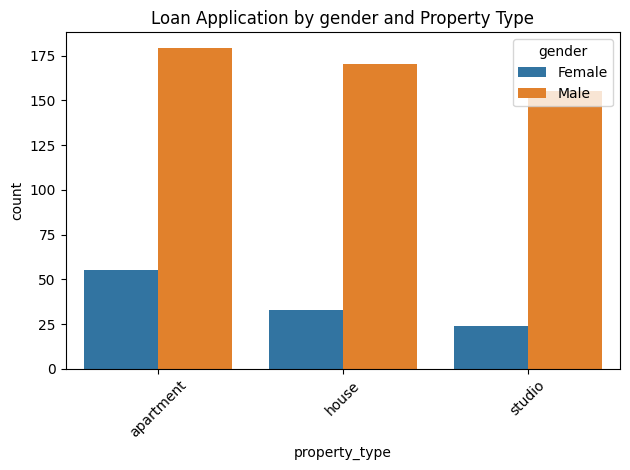

In [95]:
sns.barplot(x='property_type', y='count', hue='gender', data=df_gr1)

plt.title('Loan Application by gender and Property Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
CT = pd.crosstab(index=df_dataset['education'], columns=df_dataset['property_type'], margins=True).reset_index()
CT

property_type,education,apartment,house,studio,All
0,Graduate,187,163,131,481
1,Not Graduate,46,40,48,134
2,All,233,203,179,615


In [88]:
df_gr3 = df_dataset.groupby(['education', 'property_type'])['loan_id'].count().reset_index()
df_gr3.columns = ['education', 'property_type', 'count'] #ganti nama "loan_id"
df_gr3

,education,property_type,count
0,Graduate,apartment,188
1,Graduate,house,163
2,Graduate,studio,131
3,Not Graduate,apartment,46
4,Not Graduate,house,40
5,Not Graduate,studio,48


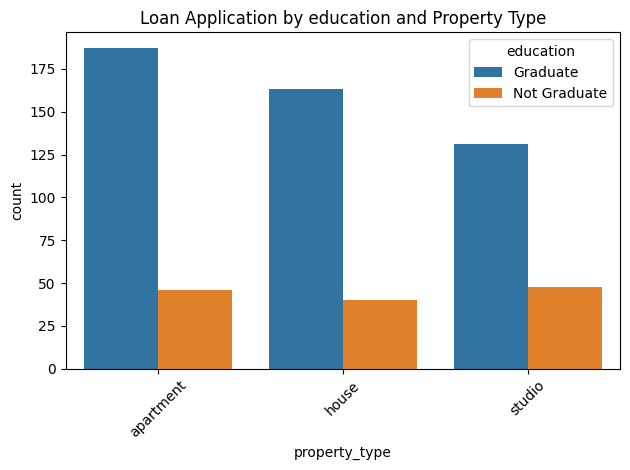

In [65]:
sns.barplot(x='property_type', y='count', hue='education', data=df_gr3)

plt.title('Loan Application by education and Property Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam

In [56]:
df_gr1 = df_dataset.groupby(['married', 'loan_term_year'])['loan_id'].count().reset_index()
df_gr1.columns = ['married', 'loan_term_year', 'count'] #ganti nama "loan_id"
df_gr1

,married,loan_term_year,count
0,No,3,2
1,No,5,1
2,No,10,1
3,No,15,8
4,No,20,1
5,No,25,3
6,No,30,188
7,No,40,9
8,Yes,1,1
9,Yes,5,1


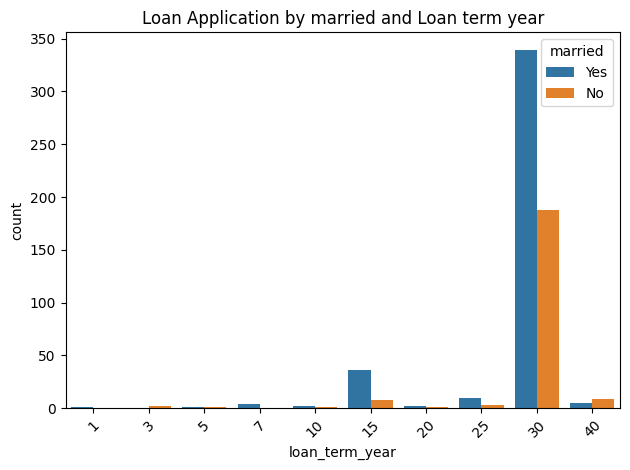

In [60]:
sns.barplot(x='loan_term_year', y='count', hue='married', data=df_gr1)

plt.title('Loan Application by married and Loan term year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
